# Séries Temporais
## Encontrar tendências, fazer prtevisões e manter controle
---
* Estuda o comportamento de uma variável contínua ao longo do tempo
    * Uma mesma variável analisada no decorrer do tempo
    * Relação no intervalo de tempo
    * O intervalo de tempo deve ser regular
    * Dependência da ordem
    * Não é possível analisar mais de uma amostra em um intervalo
* Estacionárias:
    * Flutuam em torno de uma mesma média e variância
* Não estacionárias:
    * Exibem trends, ciclos, padrões sazonais e outros comportamentos.
* Estocásticas:
    * Composta por um fator aleatório ue não pode ser explicado matematicamente.
* Determinísticas:
    * Explicaveis por meio de uma função.

## Componentes
## Podem ou não compor uma série temporal
---
* Tendência
* Sazonalidade
* Aleatoridade (ruído ou erro)

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from datetime import datetime
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pmdarima.arima import auto_arima

In [2]:
# Dados
data = pd.read_csv("datasets\AirPassengers.csv")
data.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [3]:
data.shape

(144, 2)

In [4]:
print(data.dtypes)

Month          object
#Passengers     int64
dtype: object


In [5]:
# Conversão objeto data 
dataparse = lambda dates: datetime.strptime(dates, '%Y-%m')
data = pd.read_csv("datasets\AirPassengers.csv", parse_dates=['Month'],
                  index_col = "Month", date_parser=dataparse)

In [6]:
data.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [7]:
data.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [8]:
# Criação de uma Série Temporal 
ts = data['#Passengers']
ts

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
             ... 
1960-08-01    606
1960-09-01    508
1960-10-01    461
1960-11-01    390
1960-12-01    432
Name: #Passengers, Length: 144, dtype: int64

In [9]:
print(data.dtypes)

#Passengers    int64
dtype: object


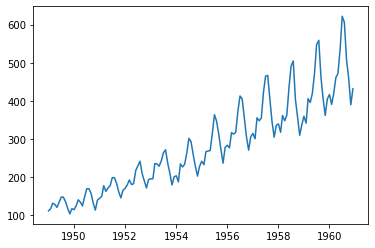

In [10]:
plt.plot(ts);

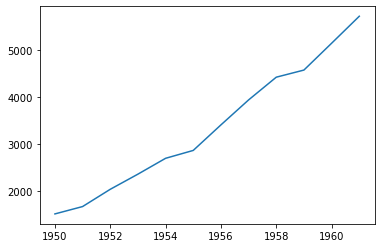

In [11]:
# Visualização por ano
ts_ano = ts.resample('A').sum()
plt.plot(ts_ano);

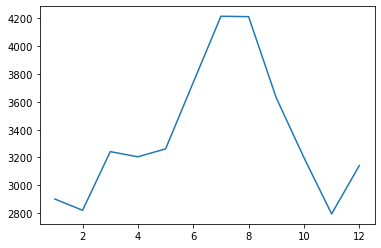

In [12]:
# Visualização por mes
ts_mes = ts.groupby([lambda x: x.month]).sum()
plt.plot(ts_mes);

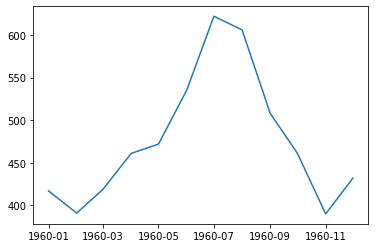

In [14]:
# Visualização entre datas especíicas 
ts_datas = ts['1960-01-01':'1960-12-01']
plt.plot(ts_datas);

In [17]:
# Decomposição da série tempora, criando uma variável para cada formarto
decomposicao = seasonal_decompose(ts)


In [18]:
# tendência
tendencia = decomposicao.trend
tendencia 

Month
1949-01-01   NaN
1949-02-01   NaN
1949-03-01   NaN
1949-04-01   NaN
1949-05-01   NaN
              ..
1960-08-01   NaN
1960-09-01   NaN
1960-10-01   NaN
1960-11-01   NaN
1960-12-01   NaN
Name: trend, Length: 144, dtype: float64

In [19]:
sazonal = decomposicao.seasonal
sazonal

Month
1949-01-01   -24.748737
1949-02-01   -36.188131
1949-03-01    -2.241162
1949-04-01    -8.036616
1949-05-01    -4.506313
                ...    
1960-08-01    62.823232
1960-09-01    16.520202
1960-10-01   -20.642677
1960-11-01   -53.593434
1960-12-01   -28.619949
Name: seasonal, Length: 144, dtype: float64

In [21]:
aleatorios = decomposicao.resid
aleatorios

Month
1949-01-01   NaN
1949-02-01   NaN
1949-03-01   NaN
1949-04-01   NaN
1949-05-01   NaN
              ..
1960-08-01   NaN
1960-09-01   NaN
1960-10-01   NaN
1960-11-01   NaN
1960-12-01   NaN
Name: resid, Length: 144, dtype: float64

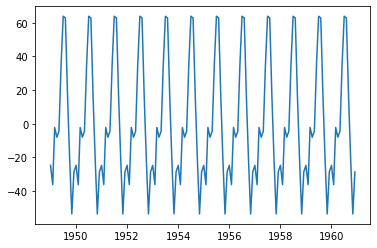

In [23]:
# visualização de gráficos para cada formarto da série temporal 
plt.plot(sazonal);

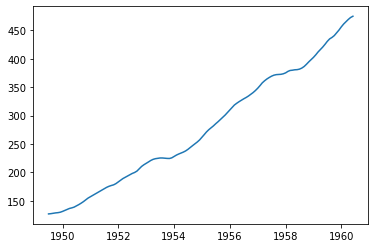

In [25]:
plt.plot(tendencia);

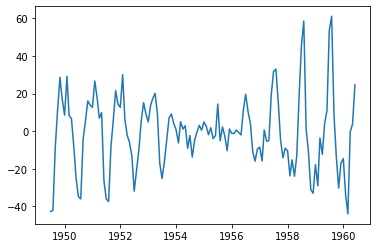

In [28]:
plt.plot(aleatorios);

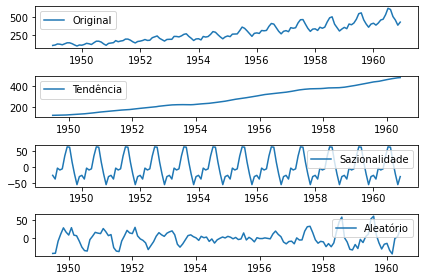

In [33]:
plt.subplot(4,1,1)
plt.plot(ts, label = 'Original')
plt.legend(loc = 'best')

plt.subplot(4,1,2)
plt.plot(tendencia, label = 'Tendência')
plt.legend(loc = 'best')

plt.subplot(4,1,3)
plt.plot(sazonal, label = 'Sazionalidade')
plt.legend(loc = 'best')

plt.subplot(4,1,4)
plt.plot(aleatorios, label = 'Aleatório')
plt.legend(loc = 'best')

plt.tight_layout()


# Criação do modelo Arima
---

In [44]:
# Criando o modelo com os parâmetros p =2, q = 1, d = 2, treinamento e visualização dos resultados
import warnings
warnings.filterwarnings("ignore")
model = ARIMA(ts, order=(2,1,2), freq=ts.index.inferred_freq)
model_treino = model.fit()
model_treino.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:          D.#Passengers   No. Observations:                  143
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -666.022
Method:                       css-mle   S.D. of innovations             24.713
Date:                Sat, 12 Jun 2021   AIC                           1344.043
Time:                        03:31:37   BIC                           1361.820
Sample:                    02-01-1949   HQIC                          1351.267
                         - 12-01-1960                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   2.5311      0.708      3.574      0.000       1.143       3.919
ar.L1.D.#Passengers     1.6477      0.033     49.933      0.000       1.583       1.712
ar.L2.D.#Passengers    -0.9094      0.033    -27.880      0.000      -0.973      -0.845
ma.L1.D.#Passengers    -1.9099      0.065    -29.519      0.000      -2.037      -1.783
ma.L2.D.#Passengers     0.9997      0.068     14.810      0.000       0.867       1.132
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.9059           -0.5281j            1.0486           -0.0840
AR.2            0.9059           +0.5281j            1.0486            0.0840
MA.1            0.9552           -0.2964j            1.0001           -0.0479
MA.2            0.9552           +0.2964j            1.0001            0.0479
-----------------------------------------------------------------------------
"""

In [45]:
# previsão pata 12 datas futuras
predict = model_treino.forecast(steps=12)[0]
predict

array([433.11793141, 450.88641383, 479.80956284, 511.97053063,
       539.32251009, 555.80617087, 558.75517006, 549.28645174,
       531.665186  , 511.90343025, 496.0286385 , 488.50502272])

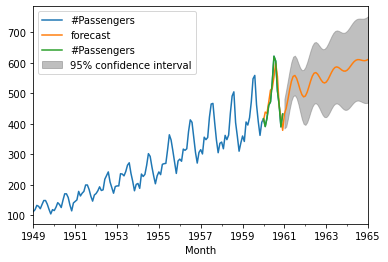

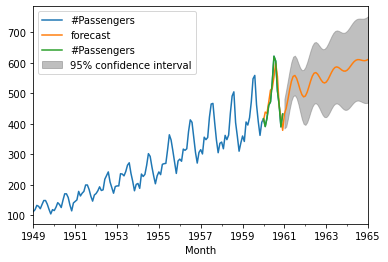

In [47]:
# Criação de eixo para a série temporal completa. com adição das previsões do modelo
eixo = ts.plot()
model_treino.plot_predict('1960-01-01','1965-01-01',
                         ax = eixo, plot_insample=True)

In [49]:
# Implementação do Auto Arima
model_auto = auto_arima(ts, m=12, seasonal=True, trace=False)
model_auto.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  144
Model:             SARIMAX(2, 1, 1)x(0, 1, [], 12)   Log Likelihood                -504.923
Date:                             Sat, 12 Jun 2021   AIC                           1017.847
Time:                                     03:42:11   BIC                           1029.348
Sample:                                          0   HQIC                          1022.520
                                             - 144                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5959      0.085      6.987      0.000       0.429       0.763
ar.L2          0.2143      0.091      2.343      0.019       0.035       0.394
ma.L1         -0.9819      0.038    -25.605      0.000      -1.057      -0.907
sigma2       129.3125     14.556      8.884      0.000     100.783     157.842
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 7.68
Prob(Q):                              0.98   Prob(JB):                         0.02
Heteroskedasticity (H):               2.33   Skew:                            -0.01
Prob(H) (two-sided):                  0.01   Kurtosis:                         4.19
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [50]:
predict = model_auto.predict(n_periods=12)
predict

array([445.63490714, 420.39494201, 449.19822468, 491.83980669,
       503.3942907 , 566.86221826, 654.25989853, 638.59716697,
       540.88337989, 494.1262208 , 423.3322736 , 465.50710847])